#### House Price Prediction from start to finish

In [1]:
# import necessary libraries 
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly   
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (LabelEncoder,
                        OneHotEncoder, StandardScaler, FunctionTransformer)
from sklearn.feature_selection import (
                        SelectKBest, chi2, mutual_info_classif, f_regression)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor 
from sklearn.model_selection import (cross_val_score, StratifiedShuffleSplit,
                                    train_test_split, GridSearchCV, train_test_split, 
                                    RandomizedSearchCV)
from sklearn.compose import ColumnTransformer
import xgboost

In [2]:
import matplotlib as mpl
from pandas.plotting import scatter_matrix
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import os
PROJECT_ROOT_DIR = os.getcwd()
print(PROJECT_ROOT_DIR)

c:\Users\Omotayo\OneDrive\Desktop\HandsOnML\hands_on_ml\regression


In [4]:
# Where to save the figures
import os
PROJECT_ROOT_DIR = os.getcwd()
CHAPTER_ID = "project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [64]:
# Loading the csv file into pandas DataFrame

df = pd.read_csv("c:\\Users\\Omotayo\\OneDrive\\Desktop\\HandsOnML\\hands_on_ml\\Chapter 2 - housing.csv")

In [65]:
housing_df = df.copy()

### Take a Quick Look at the Data Structure

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df.describe(exclude=[np.number])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


Saving figure attribute_histogram_plots


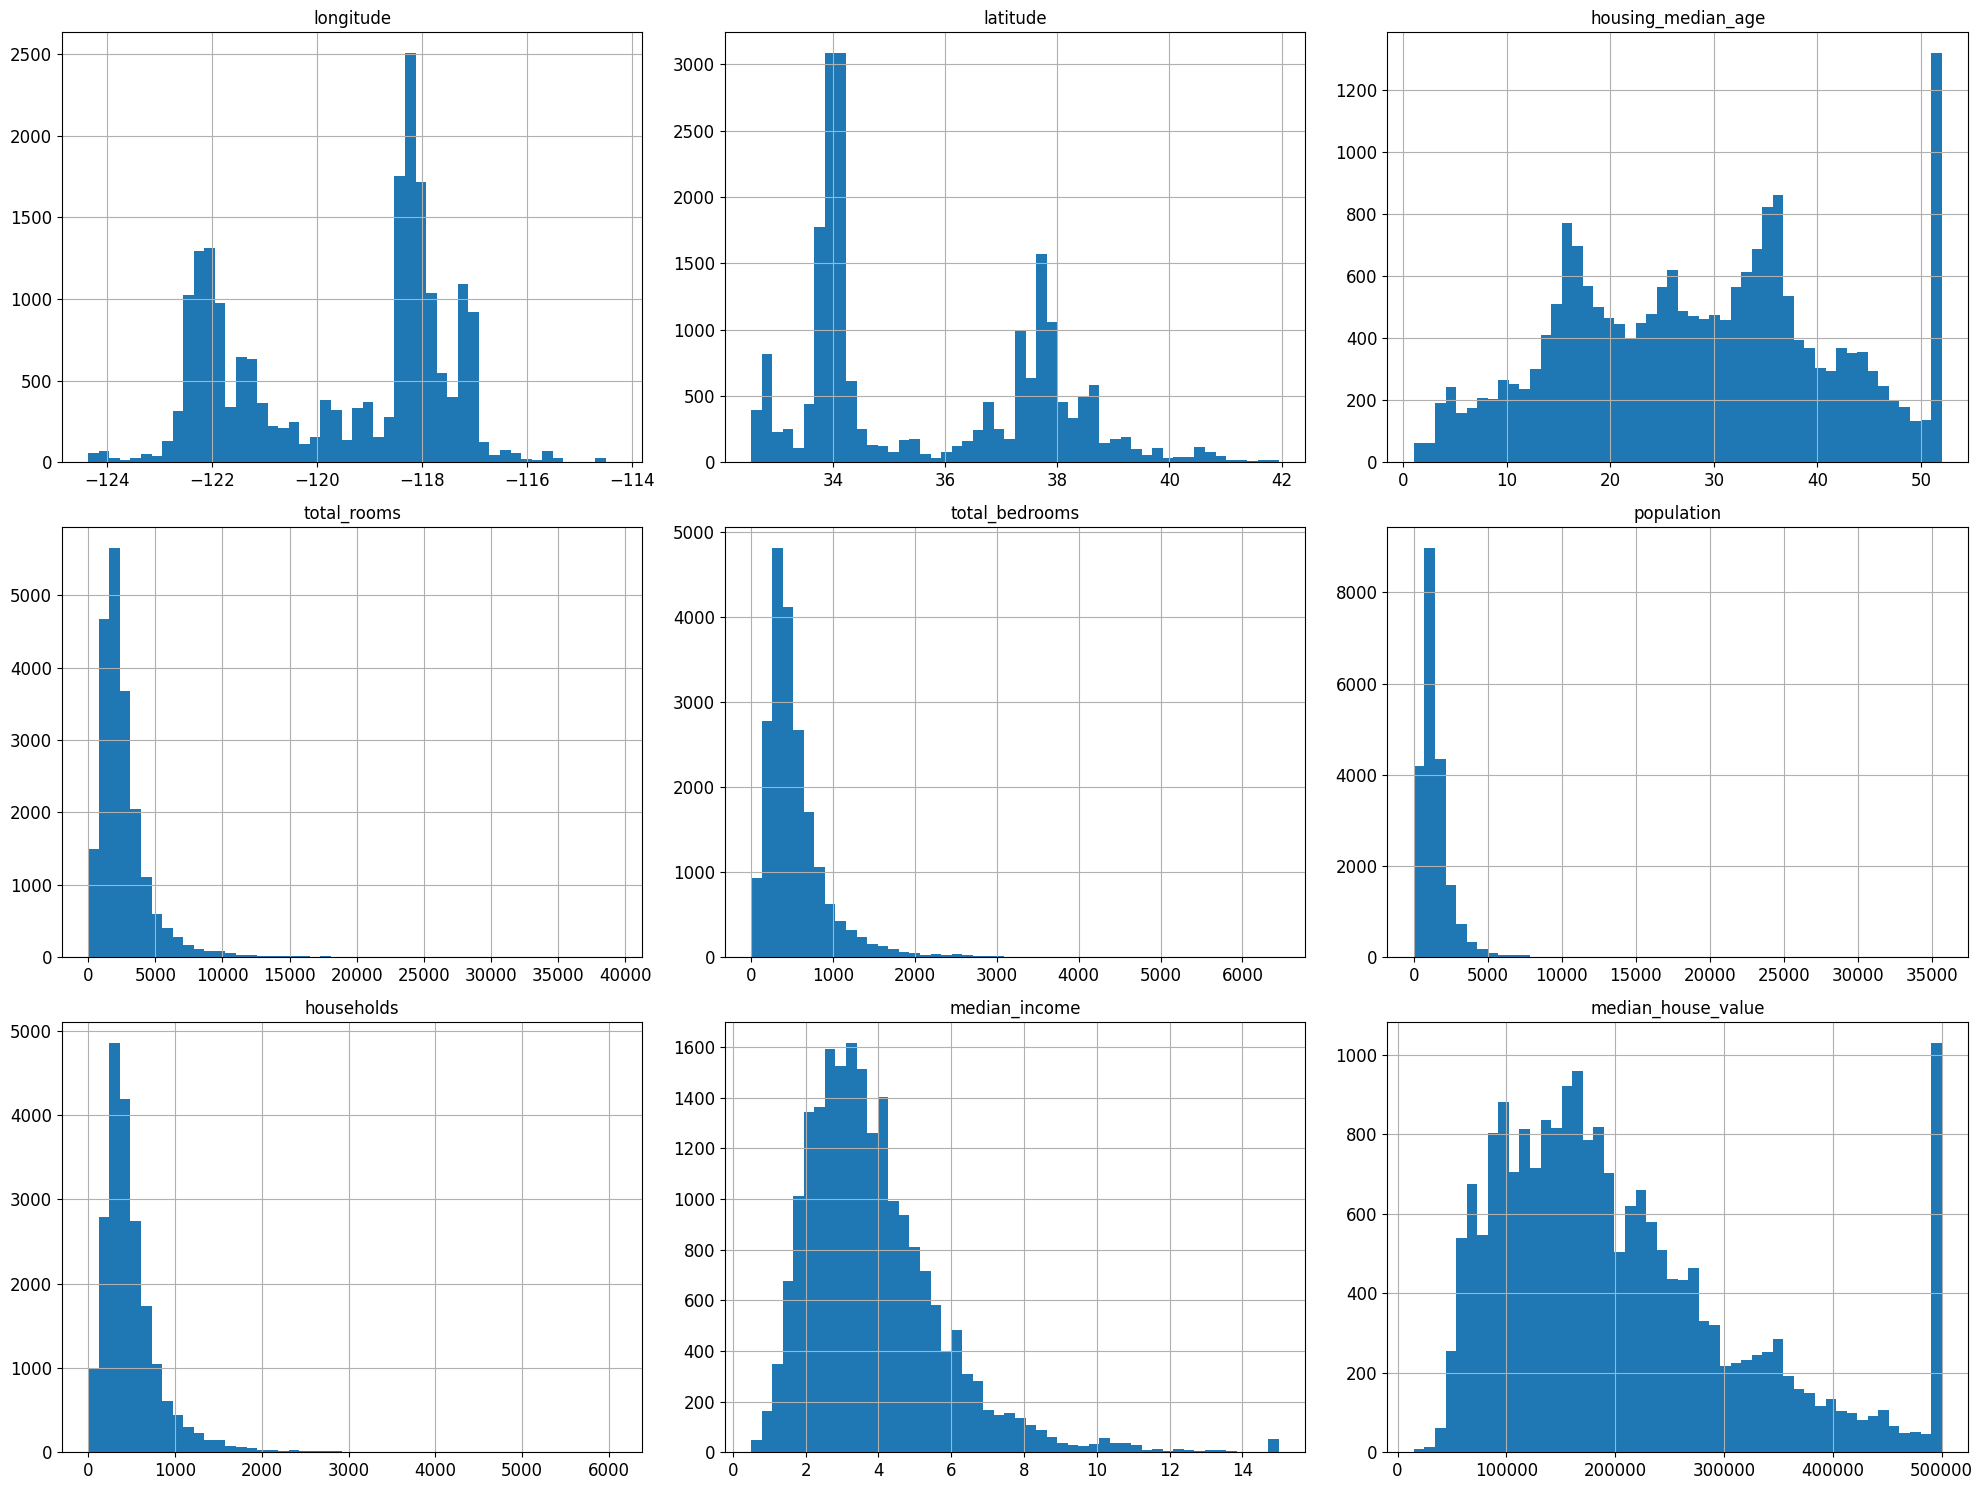

In [12]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [68]:
# Let's take a look at the categorical feature

df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: >

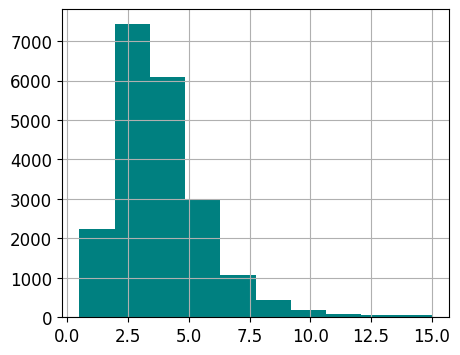

In [69]:
df['median_income'].hist(color="teal", figsize=(5,4))

In [70]:
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5]
                        )

In [71]:
df["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Saving figure income_cat_histogram.png


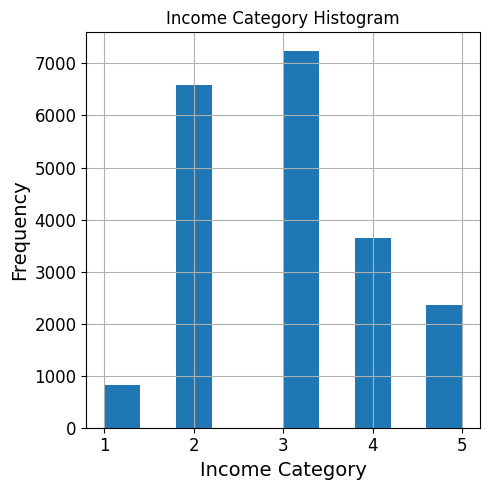

In [72]:
df["income_cat"].hist(figsize=(5, 5))
plt.title("Income Category Histogram")
plt.xlabel("Income Category")
plt.ylabel("Frequency")

# Save the figure (if needed)
save_fig("income_cat_histogram.png")

# Show the plot
plt.show()

In [73]:
stratify_split = StratifiedShuffleSplit(1, test_size=0.2, random_state=42)
for train_index, test_index in stratify_split.split(df, df['income_cat']):
    strat_train_set , strat_test_set = df.loc[train_index], df.loc[test_index]

In [74]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [75]:
df['income_cat'].value_counts() / len(df)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [76]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [77]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [78]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns =  ["income_cat"], axis="columns", inplace=True)

#### Discover and Visualize the Data to Gain Insights

In [79]:
housing = strat_train_set.copy()

Saving figure scatter2


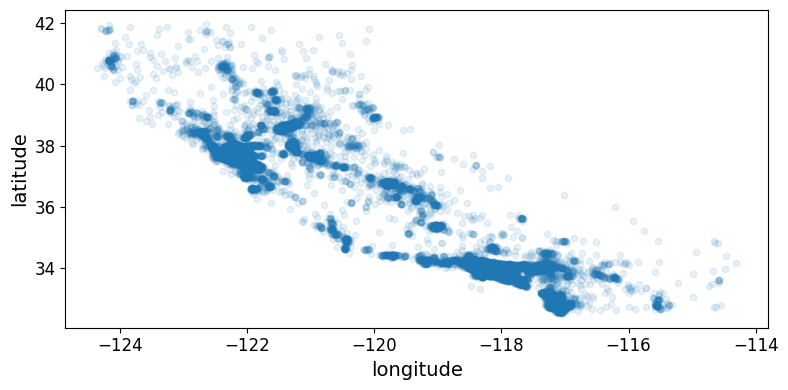

In [80]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(8,4))
save_fig("scatter2")
plt.show()

Saving figure scatterplot_with_legend


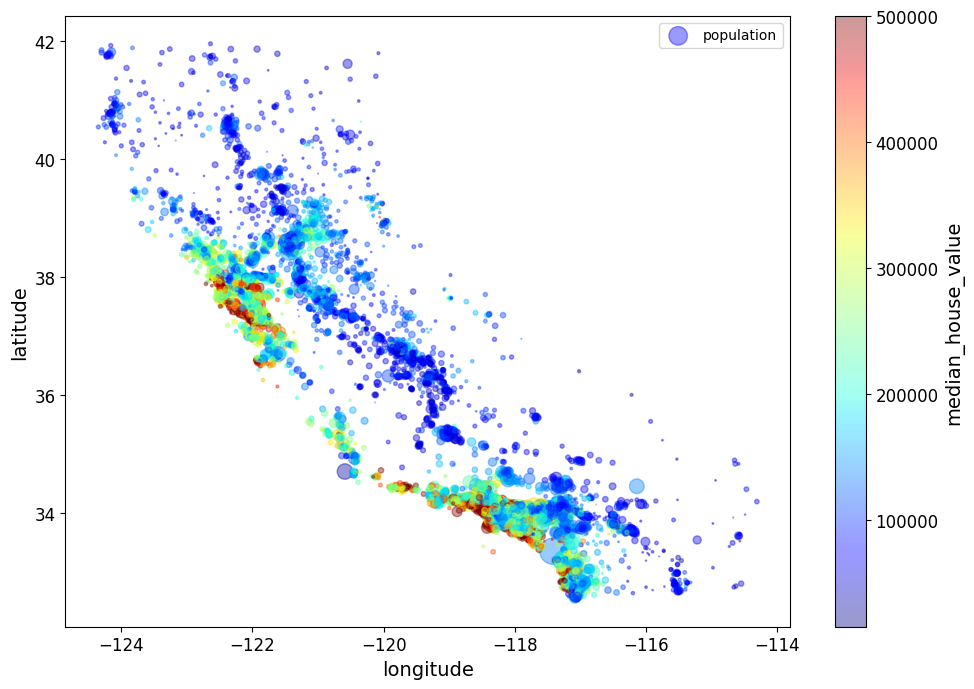

In [81]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
        )
plt.legend()
save_fig("scatterplot_with_legend")
plt.show()

In [82]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()

Saving figure scatter_matrix_plot


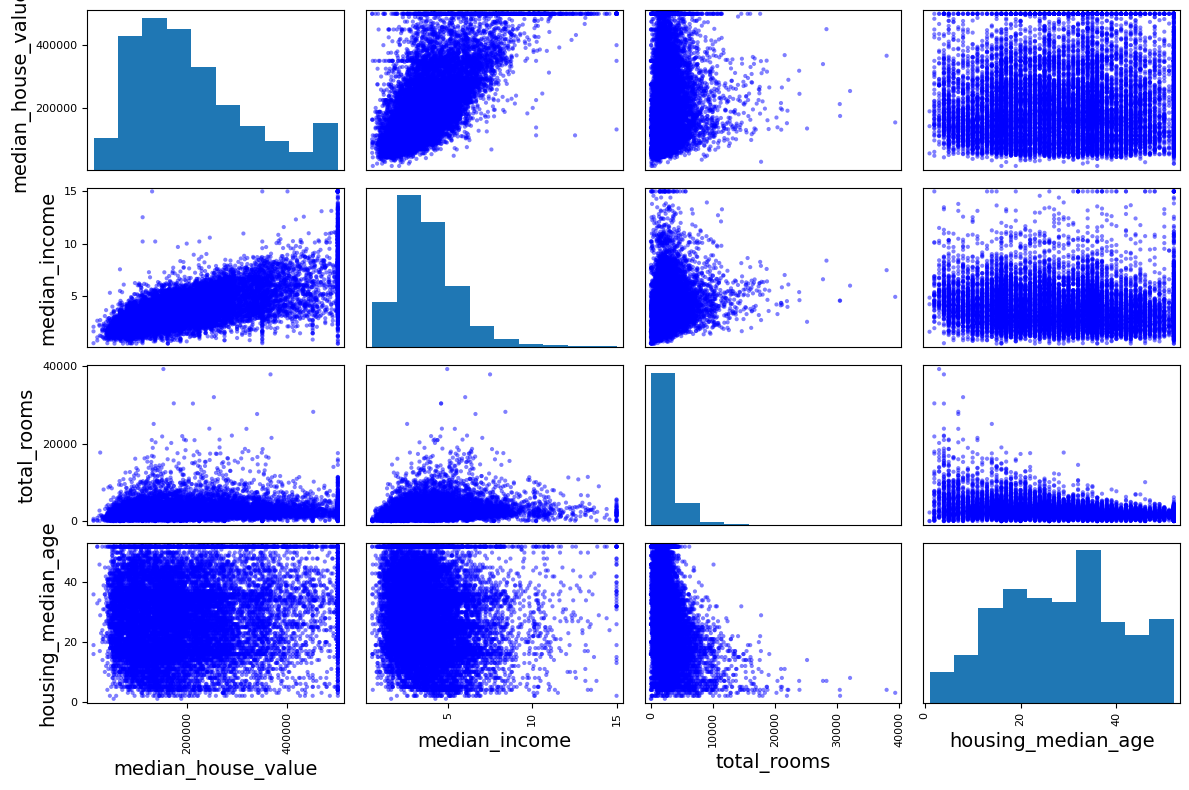

In [83]:
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), color="blue")
save_fig("scatter_matrix_plot")
plt.show()

Saving figure median_house_income_vs_median_house_value


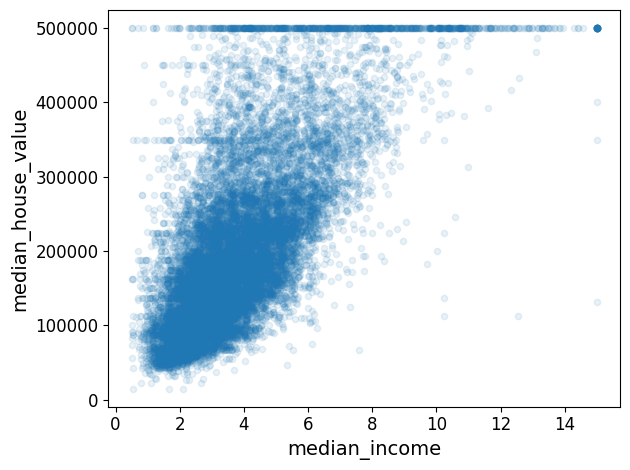

In [84]:
#A quick look at the most promising feature
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)
save_fig("median_house_income_vs_median_house_value")
plt.show() 

- We will be working on the median house value, by removing the part which remains constant all through

##### Feature Engineering

In [85]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [86]:
corr_matrix = housing.select_dtypes(exclude=object).corr()

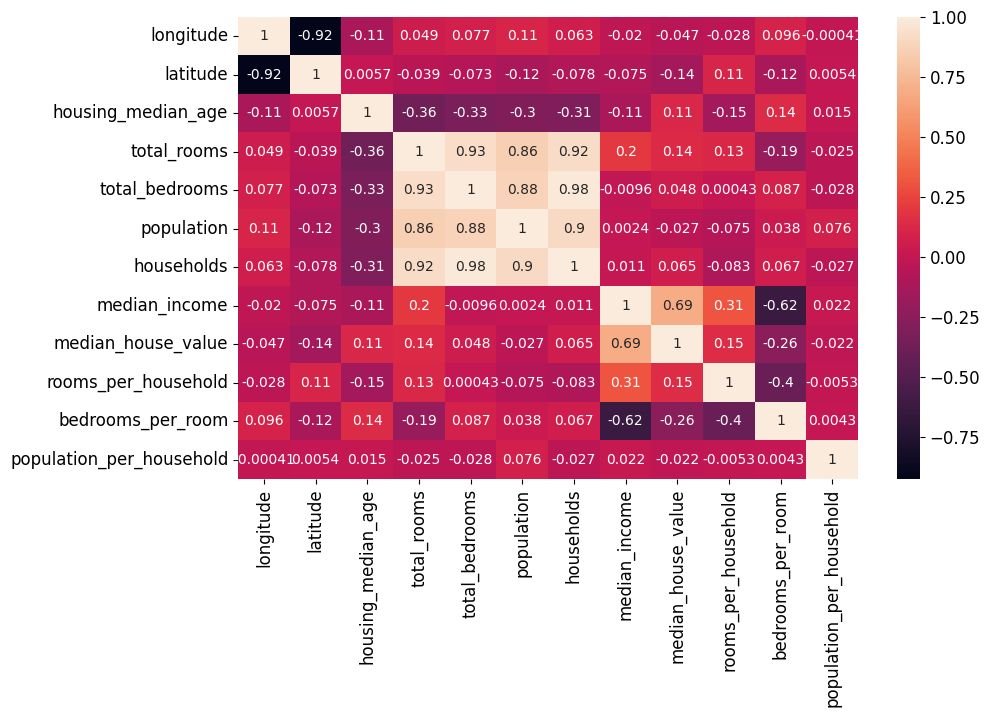

In [87]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [88]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

##### Prepare the Data for Machine Learning Algorithms

In [89]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [90]:
X = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
y = strat_train_set["median_house_value"].copy()

In [91]:
sample_incomplete_rows = X[X.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


- Note this function and classes below for tweaking later 

In [92]:
X.shape

(16512, 9)

In [93]:
type(X.select_dtypes(include=[np.number]).columns)

pandas.core.indexes.base.Index

In [94]:
X.select_dtypes(include=[np.number]).columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [95]:
X_num = X.select_dtypes(include=[np.number]).columns.to_list()
X_num.index("households")

6

In [119]:
def functiontransformer(df, column):
    """A function to transform features into normal distributions"""
    return np.power(df[column], (1/5))

def log_transformation(df, column):
    return np.log(df.column) + 1

from sklearn.base import TransformerMixin, BaseEstimator
X_cat = ["ocean_proximity"]
X_num = X.select_dtypes(include=[np.number]).columns.to_list()

# rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

rooms_ix, bedrooms_ix, population_ix, household_ix = [X_num.index(col) 
        for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]



some_column_transformer = FunctionTransformer(func=functiontransformer, validate=False)

In [97]:
# creating transformers and pipeline to handle the whole cleaning process

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("add_attribs", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])

In [98]:
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder())
])

In [99]:
Full_pipeline = ColumnTransformer(transformers=[
    ("num", num_pipeline, X_num),
    ("cat", cat_pipeline, X_cat)
 ]) #remainder="passthrough"

In [100]:
# Apply the full pipeline to the housing data
X_prepared = Full_pipeline.fit_transform(X)
X_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [101]:
X_prepared.shape

(16512, 16)

- Python Function for later use 

In [ ]:
import pandas as pd

def correlation_feature_selection(data, threshold=0.8):
    """
    Perform correlation feature extraction based on a threshold.

    Parameters:
    - data: DataFrame
        Input DataFrame containing features.
    - threshold: float, optional (default=0.8)
        Correlation threshold. Features with correlation above this threshold will be removed.

    Returns:
    - selected_features: DataFrame
        DataFrame with selected features.
    """

    # Calculate the correlation matrix
    correlation_matrix = data.corr().abs()

    # Create a mask to select only the upper triangle of the correlation matrix
    upper_triangle_mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find features with correlation above the threshold
    features_to_drop = [column for column in upper_triangle_mask.columns if any(upper_triangle_mask[column] > threshold)]

    # Drop the highly correlated features
    selected_features = data.drop(columns=features_to_drop)

    return selected_features


#### Select and Train a Model

In [109]:
# USING LINEAR REGRESSION AND LASSO REGRESSION

lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

LinearRegression()

In [110]:
lasso_reg = Lasso(alpha=0.01, fit_intercept=True, random_state=42)
# Fit the pipeline to the training data
lasso_reg.fit(X_prepared, y)

c:\Users\Omotayo\OneDrive\Desktop\HandsOnML\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.386e+12, tolerance: 2.210e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01, random_state=42)

In [111]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [112]:
X_test = strat_test_set.drop("median_house_value", axis="columns")
y_test = strat_test_set["median_house_value"]

In [113]:
X_test_prepared = Full_pipeline.fit_transform(X_test)

In [114]:
print("Predictions:", lin_reg.predict(X_test_prepared)[:10])

Predictions: [425823.80369285 294754.10037583 244271.88797501 194552.99292498
 264550.73373103 220451.95071437 157819.46463151 371200.6556061
 287998.17855961 229402.03518294]


In [116]:
# Compare against the actual values:
print("Actual_y_test:", list(y_test)[:10])

Actual_y_test: [500001.0, 162500.0, 204600.0, 159700.0, 184000.0, 151900.0, 104900.0, 500001.0, 367400.0, 346500.0]


In [117]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66975.77789893825

In [118]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

49306.8178718969

In [120]:
print("Predictions:", lasso_reg.predict(X_test_prepared)[:10])

Predictions: [425823.83867343 294754.06254432 244271.92657611 194553.05175692
 264550.6933694  220452.003399   157819.45947218 371200.59607375
 287998.09565983 229401.9717529 ]


In [121]:
from sklearn.metrics import mean_squared_error

y_prediction = lasso_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66975.81394623703

In [130]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
df_test

,Actual,Predicted
5241,500001.0,425823.838673
17352,162500.0,294754.062544
3505,204600.0,244271.926576
7777,159700.0,194553.051757
14155,184000.0,264550.693369
...,...,...
12182,110000.0,146326.122595
7275,118800.0,151944.442109
17223,293800.0,309291.281637
10786,335700.0,267724.153170


In [131]:
df_test["Residual"] = df_test['Actual'] - df_test["Predicted"]

In [132]:
df_test.head()

,Actual,Predicted,Residual
5241,500001.0,425823.838673,74177.161327
17352,162500.0,294754.062544,-132254.062544
3505,204600.0,244271.926576,-39671.926576
7777,159700.0,194553.051757,-34853.051757
14155,184000.0,264550.693369,-80550.693369


<Axes: >

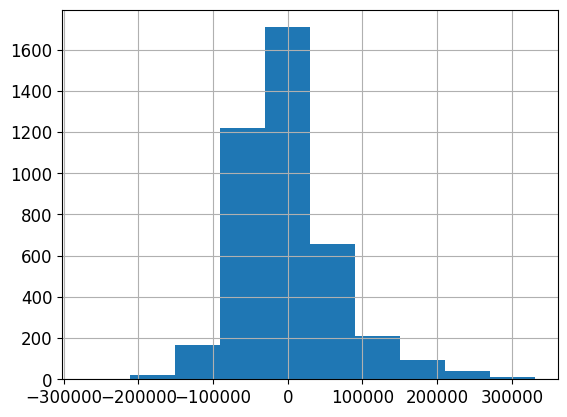

In [133]:
df_test["Residual"].hist()

In [134]:
# USING RandomForestRegressor, and xgboost

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_prepared, y)

RandomForestRegressor(random_state=42)

In [135]:
X_predictions = forest_reg.predict(X_test_prepared)
forest_mse = mean_squared_error(y_test, X_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

79038.17046694424

In [137]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [138]:
forest_scores = cross_val_score(forest_reg, X_test_prepared, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52641.97435976 55665.78065837 52668.08389307 51304.82995476
 50772.96796892 52341.66345636 52591.96883809 54047.40372791
 51714.41522404 59701.88391979]
Mean: 53345.09720010669
Standard deviation: 2495.035407517283


### Model Improvement 

In [2]:
# import necessary libraries 
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly   
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
                        OneHotEncoder, StandardScaler, FunctionTransformer)
from sklearn.feature_selection import (
                        SelectKBest, chi2, mutual_info_classif, f_regression)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor 
from sklearn.model_selection import (cross_val_score, StratifiedShuffleSplit,
                                    train_test_split, GridSearchCV, train_test_split, 
                                    RandomizedSearchCV)
from sklearn.compose import ColumnTransformer
import xgboost

In [3]:
housing_df = pd.read_csv("Chapter 2 - housing.csv")

In [4]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.shape

(20640, 10)

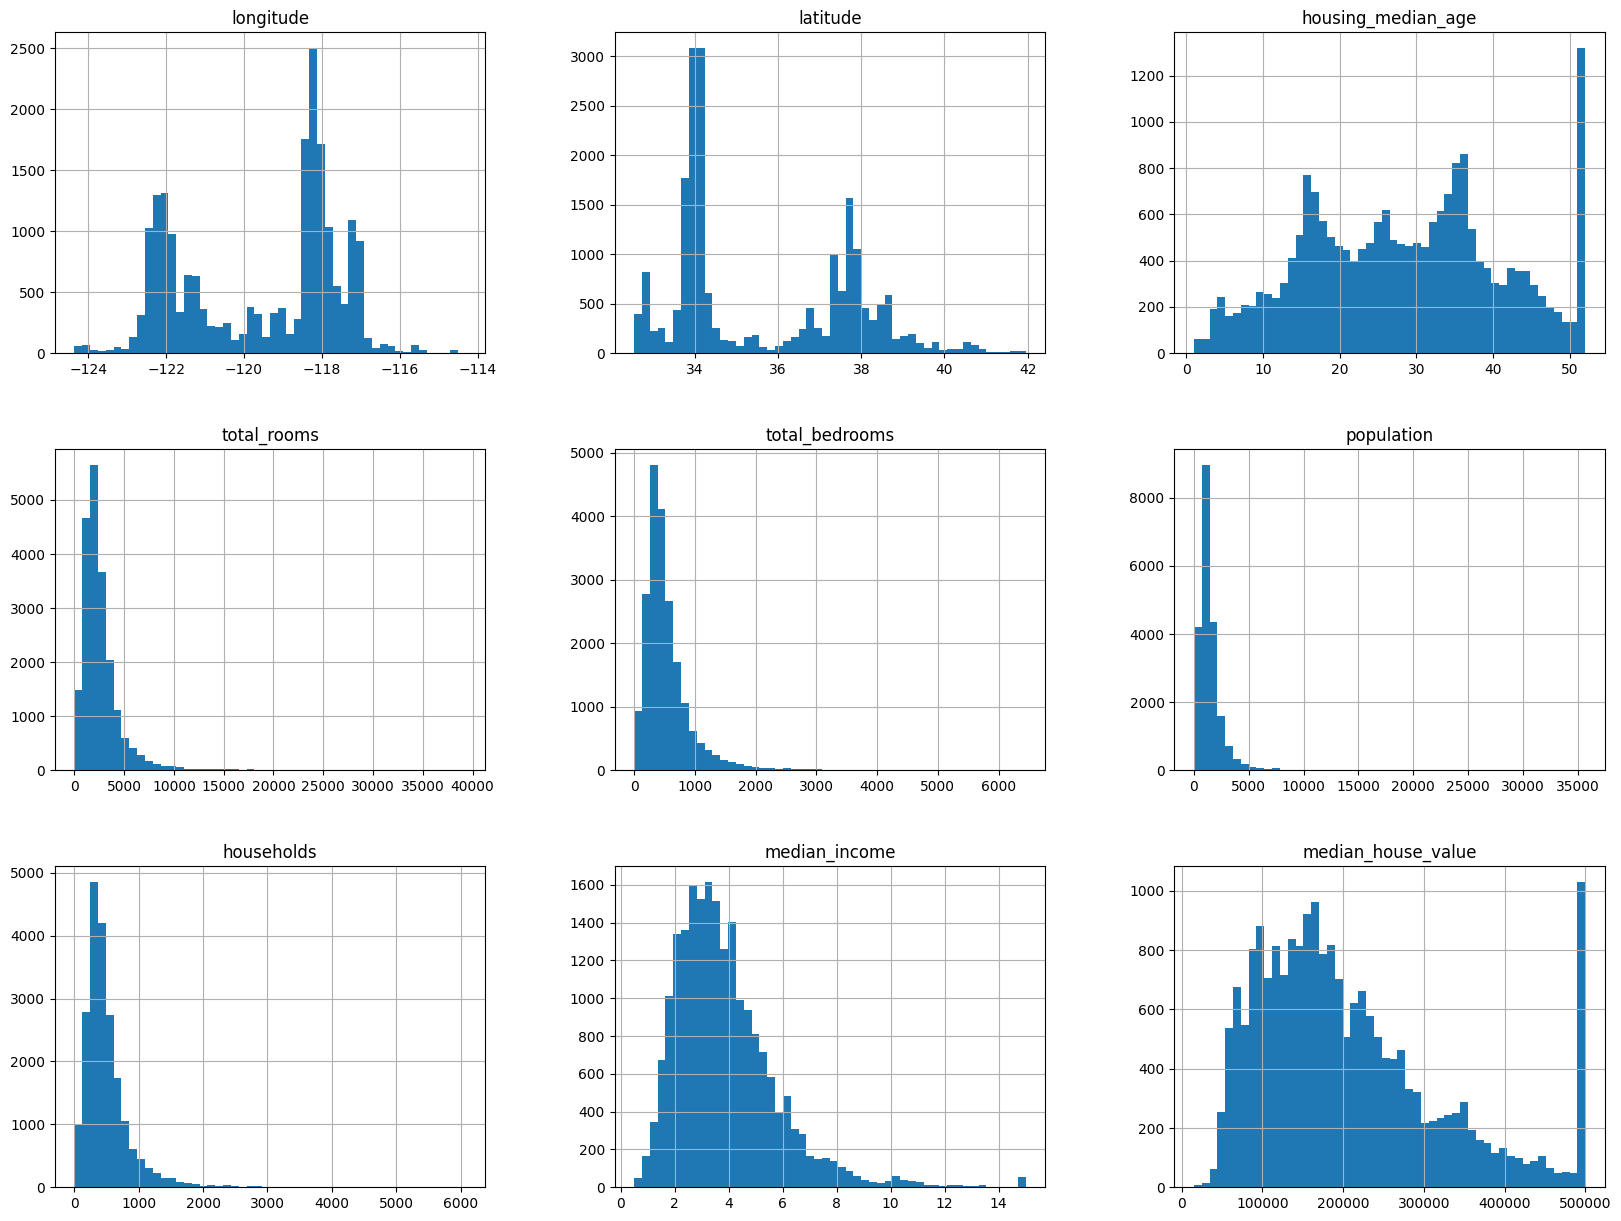

In [7]:
%matplotlib inline
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

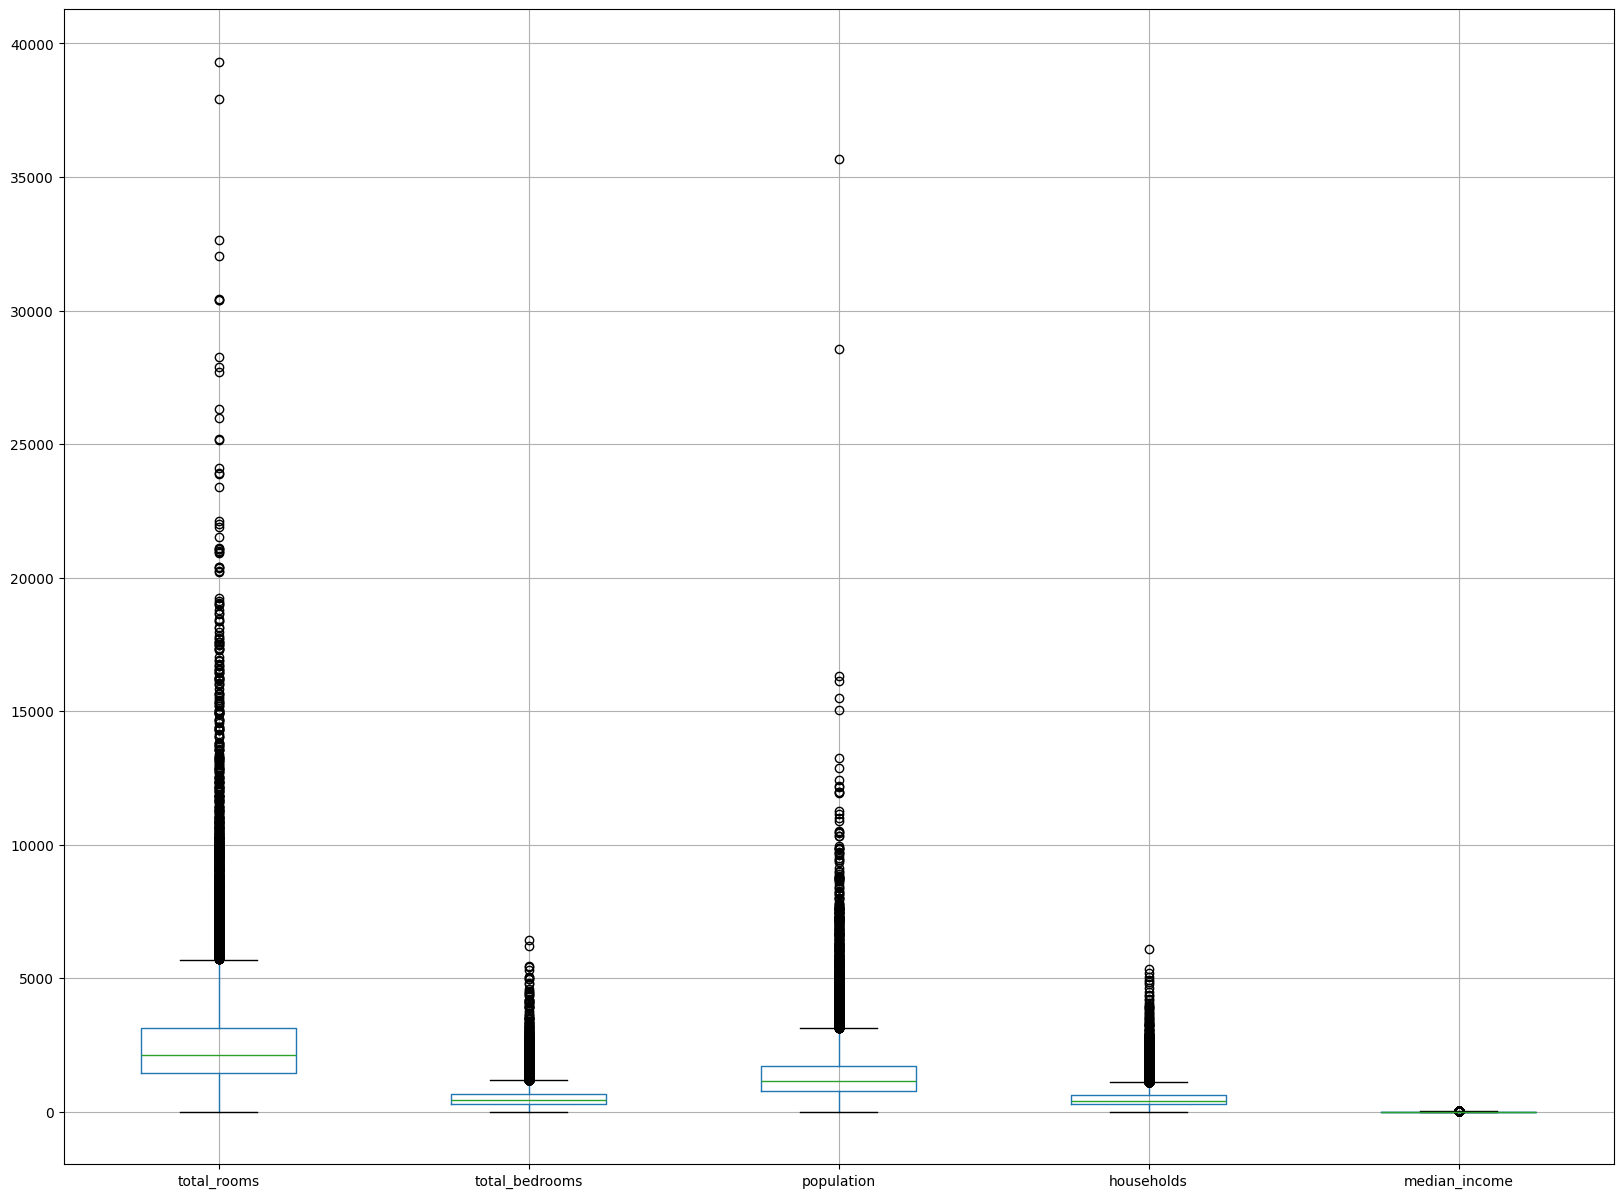

In [9]:
columns = ['total_rooms', "total_bedrooms", 'population', 'households', "median_income"]

%matplotlib inline
housing_df[columns].boxplot(figsize=(20,15))
plt.show()

In [11]:
housing_df.describe()[columns]

,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,2.000000,1.000000,3.000000,1.000000,0.499900
25%,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


<Axes: ylabel='total_bedrooms'>

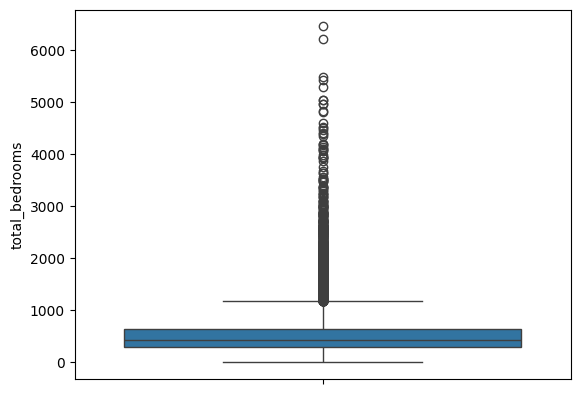

In [13]:
sns.boxplot(housing_df['total_bedrooms'])

In [16]:
def functiontransformer(df, column):
    """A function to transform features into normal distributions"""
    return np.power(df[column], (1/5))

def log_transformation(df, column):
    return np.log(df[column]) + 1

<Axes: ylabel='total_bedrooms'>

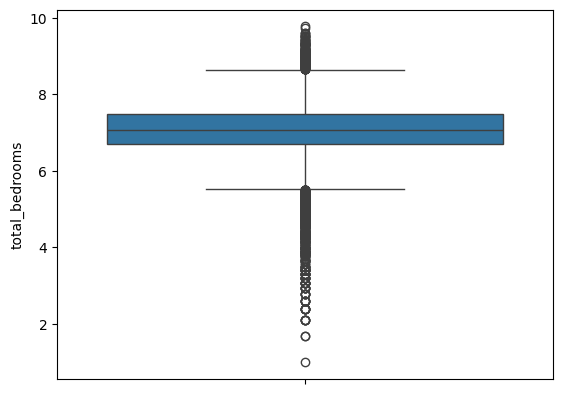

In [17]:
sns.boxplot(log_transformation(housing_df, column="total_bedrooms"))

<Axes: xlabel='total_bedrooms', ylabel='Count'>

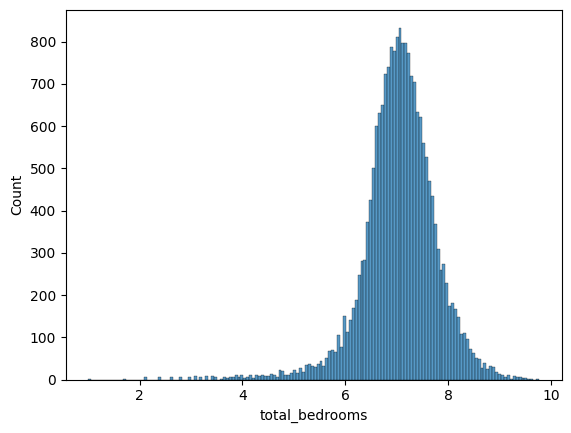

In [18]:
sns.histplot(log_transformation(housing_df, column="total_bedrooms"))

<Axes: xlabel='total_bedrooms', ylabel='Count'>

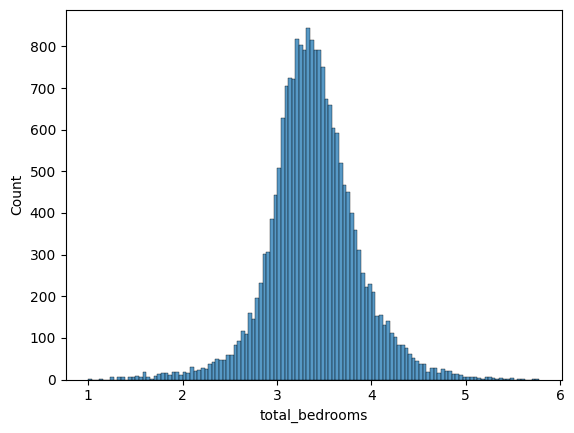

In [19]:
sns.histplot(functiontransformer(housing_df, column="total_bedrooms"))

In [20]:
# implementing a function to remove outliers

def outlier_removal(df, column):
    """A function to remove outliers from a DataFrame."""
    
    # Input validation
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    # Calculate quantiles
    low, high = df[column].quantile([0.1, 0.9])

    # Create a mask to filter outliers
    mask_area = df[column].between(low, high)

    # Return the DataFrame after removing outliers
    return df[mask_area]

In [21]:
import numpy as np
import pandas as pd

def remove_outliers(data, column, threshold=1.5):
    """
    Remove outliers from a DataFrame using the interquartile range (IQR) method.

    Parameters:
    - data: pd.DataFrame
        The DataFrame containing the data.
    - column: str
        The column name for which outliers should be removed.
    - threshold: float, optional
        The threshold for determining outliers. Defaults to 1.5 times the IQR.

    Returns:
    - pd.DataFrame
        A new DataFrame with outliers removed.
    """

    # Calculate the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Remove outliers
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data_filtered

# Example usage:
# Assuming 'df' is your DataFrame and 'column_name' is the column for which you want to remove outliers
# df = remove_outliers(df, 'column_name')


##### Before my modelling I will be implementing a full function that does four things:
1. Removed Capped values in the Target Variable 
2. Input missing values 
3. Outlier removal 
4. Column Transformations : Standardization for scaling all features and function transformation for some columns 

In [45]:
housing_df.shape

(20640, 10)

In [46]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
# Check for missing values and duplicates 

housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [48]:
housing_to_clean = housing_df.copy()

In [49]:
housing_to_clean.shape

(20640, 10)

In [50]:
(housing_to_clean[housing_to_clean["median_house_value"] < 500_000]).shape

(19648, 10)

In [51]:
housing_to_clean = housing_to_clean[housing_to_clean["median_house_value"] < 500_000]

In [52]:
housing_to_clean.shape

(19648, 10)

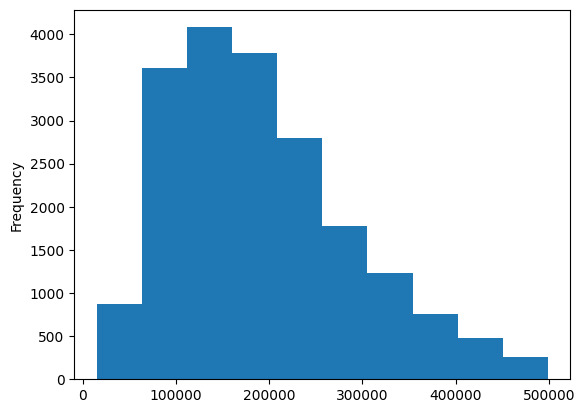

In [53]:
housing_to_clean['median_house_value'].plot(kind="hist")
plt.show()

In [54]:
housing_to_clean['total_bedrooms'].fillna(
                housing_to_clean['total_bedrooms'].median(), inplace=True)

In [55]:
housing_to_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [56]:
considered_columns = ['total_rooms', "total_bedrooms", 'population', 'households', "median_income"]

for column in considered_columns:
    housing_to_clean = remove_outliers(housing_to_clean, column)

In [57]:
housing_to_clean.shape

(16959, 10)

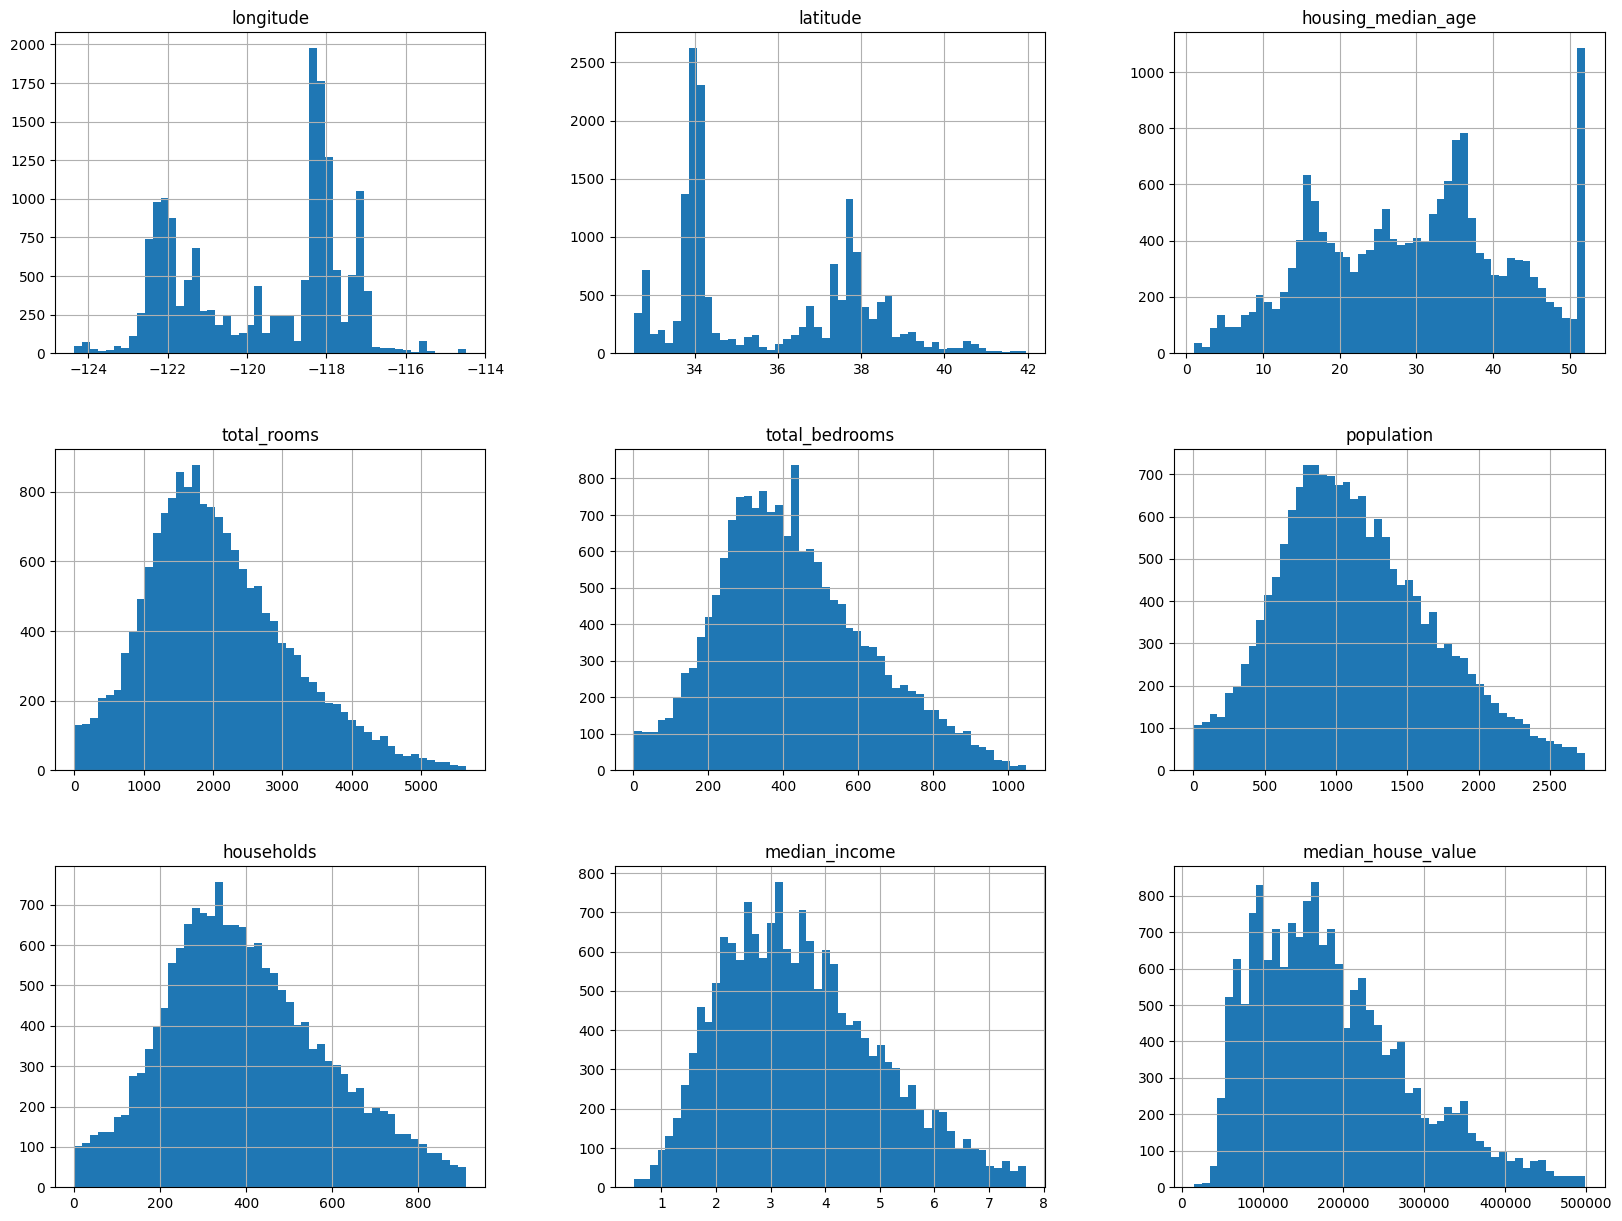

In [58]:
%matplotlib inline
housing_to_clean.hist(bins=50, figsize=(20,15))
plt.show()

In [59]:
housing_to_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16959.000000,16959.000000,16959.000000,16959.000000,16959.000000,16959.000000,16959.000000,16959.000000,16959.000000
mean,-119.612337,35.710241,29.764727,2073.570081,427.953299,1150.959608,400.368713,3.565771,186637.802701
std,2.004672,2.172774,12.201901,1024.008643,200.026392,551.486233,186.632031,1.422837,94553.335938
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.780000,33.940000,20.000000,1348.000000,284.000000,754.000000,268.000000,2.484400,112500.000000
50%,-118.640000,34.380000,31.000000,1934.000000,405.000000,1086.000000,380.000000,3.395800,169300.000000
75%,-118.030000,37.750000,38.000000,2687.000000,554.000000,1506.000000,521.000000,4.493400,241000.000000
max,-114.490000,41.950000,52.000000,5645.000000,1047.000000,2748.000000,910.000000,7.668500,499100.000000


In [60]:
housing_to_clean = housing_to_clean[housing_to_clean["housing_median_age"] < 52]

In [61]:
housing_to_clean.shape

(15916, 10)

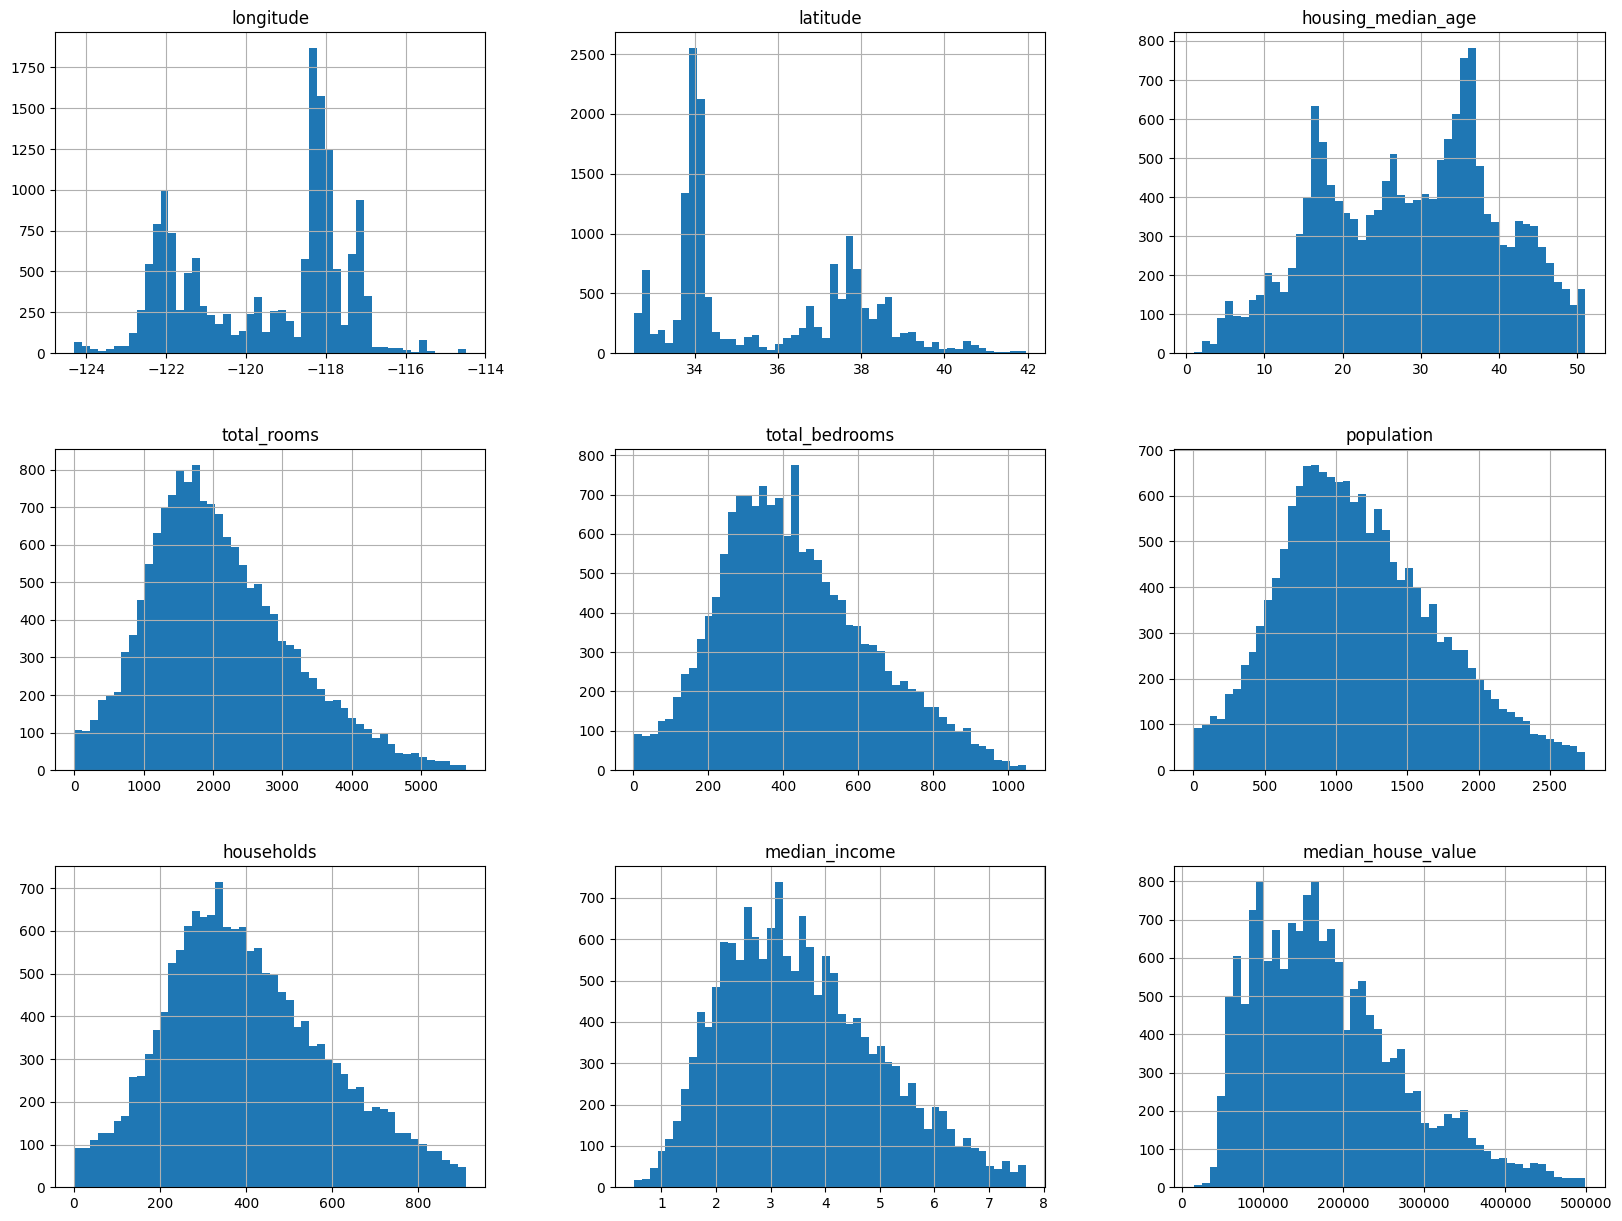

In [62]:
%matplotlib inline
housing_to_clean.hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
rooms, bedrooms, population, household = [list(housing_to_clean.columns).index(col) 
        for col in ("total_rooms", "total_bedrooms", "population", "households")]

In [82]:
rooms, bedrooms, population, household

(3, 4, 5, 6)

In [83]:
def feature_engineering(data, add_bedrooms_per_room=True):
    room_per_household = data.iloc[:, rooms] / data.iloc[:, household]
    population_per_household = data.iloc[:, population] / data.iloc[:, household]
    if add_bedrooms_per_room:
        bedrooms_per_room = data.iloc[:, bedrooms] / data.iloc[:, rooms]
        return np.c_[data, room_per_household, population_per_household, bedrooms_per_room]
    else:
        return np.c_[data, room_per_household, population_per_household]

In [65]:
housing_to_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7008
INLAND        5532
NEAR OCEAN    2037
NEAR BAY      1337
ISLAND           2
Name: count, dtype: int64

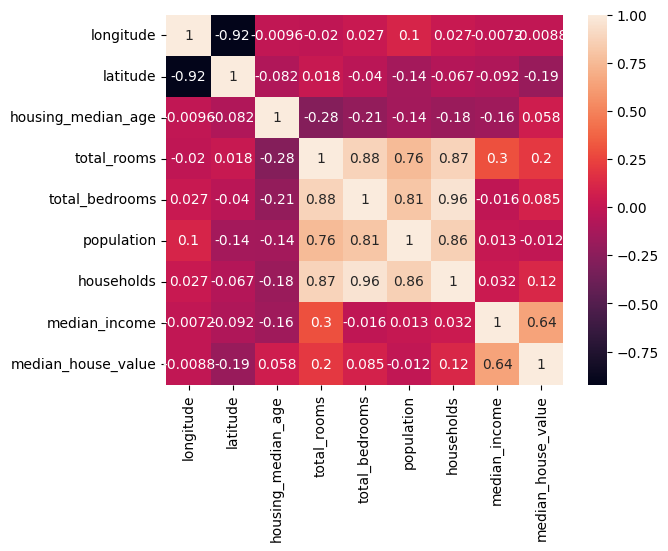

In [69]:
df_corr = housing_to_clean.select_dtypes(include=[np.number]).corr()

sns.heatmap(df_corr, annot=True)
plt.show()

In [70]:
df_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.643780
total_rooms           0.199025
households            0.116755
total_bedrooms        0.085012
housing_median_age    0.057587
longitude            -0.008830
population           -0.012259
latitude             -0.190583
Name: median_house_value, dtype: float64

In [74]:
import scipy

In [76]:
scipy.stats.skew(functiontransformer(housing_to_clean, column="total_bedrooms"))

-1.0612739803706734

In [77]:
scipy.stats.skew(log_transformation(housing_to_clean, column="total_bedrooms"))

-1.9442362513454994

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [85]:
housing_to_clean = feature_engineering(housing_to_clean)

In [86]:
housing_to_clean.shape

(15916, 13)

In [89]:
housing_to_clean = pd.DataFrame(housing_to_clean, columns=list(housing_df.columns) + 
                                ["room_per_household", "population_per_household", "bedrooms_per_room"])

In [90]:
housing_to_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,population_per_household,bedrooms_per_room
0,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,2.026891,0.260274
1,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.125,140000.0,NEAR BAY,4.242424,2.640152,0.252679
2,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,5.343675,2.362768,0.203216
3,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY,4.524096,2.463855,0.245007
4,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,NEAR BAY,4.478142,2.538251,0.223917


In [91]:
housing_to_clean.shape

(15916, 13)

In [93]:
housing_to_clean["income_cat"] = pd.cut(housing_to_clean["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5]
                        )

In [95]:
housing_to_clean["income_cat"].value_counts()

income_cat
3    5752
2    5440
4    2922
5    1118
1     684
Name: count, dtype: int64

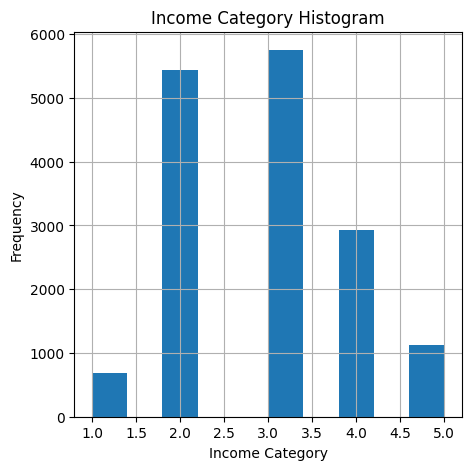

In [98]:
housing_to_clean["income_cat"].hist(figsize=(5, 5))
plt.title("Income Category Histogram")
plt.xlabel("Income Category")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [132]:
stratify_split = StratifiedShuffleSplit(1, test_size=0.2, random_state=42)
for train_index, test_index in stratify_split.split(housing_to_clean, housing_to_clean['income_cat']):
    strat_train_set , strat_test_set = housing_to_clean.loc[train_index], housing_to_clean.loc[test_index]

In [133]:
strat_test_set.shape

(3184, 14)

In [134]:
strat_train_set.shape

(12732, 14)

In [135]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns =  ["income_cat"], axis="columns", inplace=True)

In [136]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12732 entries, 7215 to 3830
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   longitude                 12732 non-null  object
 1   latitude                  12732 non-null  object
 2   housing_median_age        12732 non-null  object
 3   total_rooms               12732 non-null  object
 4   total_bedrooms            12732 non-null  object
 5   population                12732 non-null  object
 6   households                12732 non-null  object
 7   median_income             12732 non-null  object
 8   median_house_value        12732 non-null  object
 9   ocean_proximity           12732 non-null  object
 10  room_per_household        12732 non-null  object
 11  population_per_household  12732 non-null  object
 12  bedrooms_per_room         12732 non-null  object
dtypes: object(13)
memory usage: 1.4+ MB


In [137]:
num_column = [col for col in strat_test_set.columns if col != "ocean_proximity"]
cat_attribs = ["ocean_proximity"]

In [138]:
num_column

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'room_per_household',
 'population_per_household',
 'bedrooms_per_room']

In [139]:
for col in num_column:
    strat_train_set[col] = strat_train_set[col].astype(float)
    strat_test_set[col] = strat_test_set[col].astype(float)

In [140]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12732 entries, 7215 to 3830
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 12732 non-null  float64
 1   latitude                  12732 non-null  float64
 2   housing_median_age        12732 non-null  float64
 3   total_rooms               12732 non-null  float64
 4   total_bedrooms            12732 non-null  float64
 5   population                12732 non-null  float64
 6   households                12732 non-null  float64
 7   median_income             12732 non-null  float64
 8   median_house_value        12732 non-null  float64
 9   ocean_proximity           12732 non-null  object 
 10  room_per_household        12732 non-null  float64
 11  population_per_household  12732 non-null  float64
 12  bedrooms_per_room         12732 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.4+ MB


In [141]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3184 entries, 15217 to 84
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 3184 non-null   float64
 1   latitude                  3184 non-null   float64
 2   housing_median_age        3184 non-null   float64
 3   total_rooms               3184 non-null   float64
 4   total_bedrooms            3184 non-null   float64
 5   population                3184 non-null   float64
 6   households                3184 non-null   float64
 7   median_income             3184 non-null   float64
 8   median_house_value        3184 non-null   float64
 9   ocean_proximity           3184 non-null   object 
 10  room_per_household        3184 non-null   float64
 11  population_per_household  3184 non-null   float64
 12  bedrooms_per_room         3184 non-null   float64
dtypes: float64(12), object(1)
memory usage: 348.2+ KB


In [142]:
num_attribs = strat_test_set.select_dtypes(include=[np.number]).columns.to_list()

In [160]:
num_attribs = [col for col in num_attribs if col != "median_house_value"]

In [161]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'room_per_household',
 'population_per_household',
 'bedrooms_per_room']

In [162]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,population_per_household,bedrooms_per_room
7215,-122.55,38.00,18.0,3119.0,803.0,1395.0,722.0,3.9265,301100.0,NEAR BAY,4.319945,1.932133,0.257454
7025,-118.12,34.71,46.0,40.0,10.0,14.0,7.0,1.1250,225000.0,INLAND,5.714286,2.000000,0.250000
6869,-118.32,33.82,25.0,2587.0,512.0,1219.0,509.0,4.4271,382100.0,<1H OCEAN,5.082515,2.394892,0.197913
5490,-118.11,34.01,43.0,1539.0,386.0,1122.0,377.0,2.4605,196000.0,<1H OCEAN,4.082228,2.976127,0.250812
11796,-117.07,33.03,15.0,1095.0,158.0,361.0,176.0,6.8099,328200.0,<1H OCEAN,6.221591,2.051136,0.144292


In [163]:
X_train = housing.drop(columns=["median_house_value"], axis=1)
y_train = housing['median_house_value']

In [164]:
# let's create a pipeline to do two things, scaling the numerical features and encoding categorical features

num_pipeline = Pipeline([
    ("scaler", StandardScaler()), 

])

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder())
])

In [165]:
full_pipeline = ColumnTransformer(
    transformers= [
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
])

In [166]:
housing_prepared = full_pipeline.fit_transform(X_train)

In [167]:
housing_prepared.shape

(12732, 16)

In [168]:
housing_prepared

array([[-1.52225288,  1.08018852, -0.91940902, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.71260738, -0.43367882,  1.59074322, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61171076, -0.84320525, -0.29187096, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.73918062,  1.28265103,  0.06672221, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62684525, -0.73277116, -0.47116755, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65206941, -0.7649811 ,  1.41144663, ...,  0.        ,
         0.        ,  0.        ]])

In [169]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, y_train)

LinearRegression()

In [170]:
X_test = strat_test_set.drop(columns=["median_house_value"], axis=1)
y_test = strat_test_set['median_house_value']

In [171]:
X_test.shape

(3184, 12)

In [172]:
test_prepared = full_pipeline.fit_transform(X_test)

In [173]:
test_prepared.shape

(3184, 16)

In [174]:
predictions = lin_reg.predict(test_prepared)

In [175]:
predictions

array([102132.49532331, 105724.23253936, 111348.52906962, ...,
       233854.50749324,  82416.56835891, 139081.25763763])

In [177]:
from sklearn.metrics import mean_squared_error

In [178]:
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

56483.59244700465

In [179]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, predictions)
lin_mae

41608.649450569515

In [180]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [181]:
lin_scores = cross_val_score(lin_reg, housing_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [59666.84901359 57193.94753871 57213.70874079 57102.70543923
 56057.54952393 56477.38754026 55423.84564116 57060.07819093
 55075.45055609 55179.75015856]
Mean: 56645.127234324544
Standard deviation: 1288.9135357417274


In [182]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, y_train)

RandomForestRegressor(random_state=42)

In [183]:
housing_predictions = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

45784.18991085543

In [184]:
forest_scores = cross_val_score(forest_reg, housing_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [45695.39089424 42801.29310249 45309.93738127 43736.4188829
 44311.17367857 44805.60446252 43639.07301391 44605.3972157
 43243.36899486 42083.78124933]
Mean: 44023.143887579645
Standard deviation: 1076.0246060331856


In [185]:
# The last of the puzzle : Feature selection